In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import datetime
import time
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
columns = ['Year', 'Week Start', 'Week End', 'Section', 'Number', 'Headline', 'Body Text']
articles_df = pd.read_csv('articles/articles_db.csv', names=columns)

In [3]:
articles_df.head(100)

,Year,Week Start,Week End,Section,Number,Headline,Body Text
0,2000,2000-01-03,2000-01-09,business,0,There's no time to waste,"Over the past few months, President Clinton ha..."
0,2000,2000-01-03,2000-01-09,business,1,Ford staff threaten strike,Leaders of salaried staff at Ford are threaten...
0,2000,2000-01-03,2000-01-09,business,2,There's no time to waste,"Over the past few months, President Clinton ha..."
0,2000,2000-01-03,2000-01-09,business,3,Cybersquatters with an eye for domain chance,"What's in a domain name? Loadsamoney, apparent..."
0,2000,2000-01-03,2000-01-09,business,4,Clicks and mortar leave property crumbling away,The property market looks in pretty good healt...
0,2000,2000-01-03,2000-01-09,business,5,Labour isn't working hard enough,Few people I know would dissent from the propo...
0,2000,2000-01-03,2000-01-09,business,6,Dunces excel in the knowledge economy,While all the fashionable blather is of a know...
0,2000,2000-01-03,2000-01-09,business,7,Russia Y2K bill 'shows West overreacted',Russia spent just $200 million on preparing fo...
0,2000,2000-01-03,2000-01-09,business,8,Briefcase,"BUY... Domino's Pizza company, which last week..."
0,2000,2000-01-03,2000-01-09,business,9,TransTec duo kept silent on £11m claim,"Two former executive directors of TransTec, th..."


In [4]:
articles_df.shape

(88745, 7)

In [7]:
relevant_words = np.genfromtxt('Keywords.txt', dtype='str')

In [8]:
def find_relevant(text, n):
    text = str(text)
    num_relevant_words = [word for word in relevant_words if ((' '+word+' ') in text)]
    if len(num_relevant_words) > n:
        return True
    else:
        return False

In [10]:
text = articles_df['Body Text'].values[0]

n= 7
relevant_articles = [find_relevant(text, n) for text in articles_df['Body Text'].values]
relevant_df = articles_df[relevant_articles]
weekly_articles = relevant_df.groupby('Week Start').size().reset_index()

### Look at the most frequently occuring words in the relevant articles

In [19]:
business_news = relevant_df[relevant_df['Section'] == 'business']
business_news.head()

,Year,Week Start,Week End,Section,Number,Headline,Body Text
0,2000,2000-01-10,2000-01-16,business,1,Confidence in a tarnished age,Confidence is at the heart of economic policy....
0,2000,2000-01-17,2000-01-23,business,2,Banker with Euro vision,The president of the European Central Bank is ...
0,2000,2000-01-17,2000-01-23,business,7,Mean times over Greenwich,On New Year's Eve a prominent industrialist an...
0,2000,2000-01-24,2000-01-30,business,2,Euro tests fall short,For a Government policy which began in the pub...
0,2000,2000-01-24,2000-01-30,business,27,ECB in the dock over exchange rate,With Rhodia just about to sign up a 1.2bn euro...


In [28]:
vectorizer = CountVectorizer(min_df=2, stop_words='english')
business_words = vectorizer.fit_transform(business_news['Body Text'])

In [30]:
business_word_freqs = [(word, business_words.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_business_words = sorted (business_word_freqs, key = lambda x: -x[1])

NameError: name 'sorted_words' is not defined

In [35]:
top_businesswords = pd.DataFrame.from_records(sorted_business_words, columns=['word', 'count'])
top_businesswords.head(10)

,word,count
0,year,12480
1,bank,12357
2,economy,11986
3,said,11554
4,growth,10673
5,uk,10135
6,bst,9179
7,market,8871
8,economic,8869
9,government,8443


In [36]:
from wordcloud import WordCloud

In [ ]:
wordcloud = WordCloud(max_font_size=40).generate(''.join(list(business_news['Body Text'].values)))

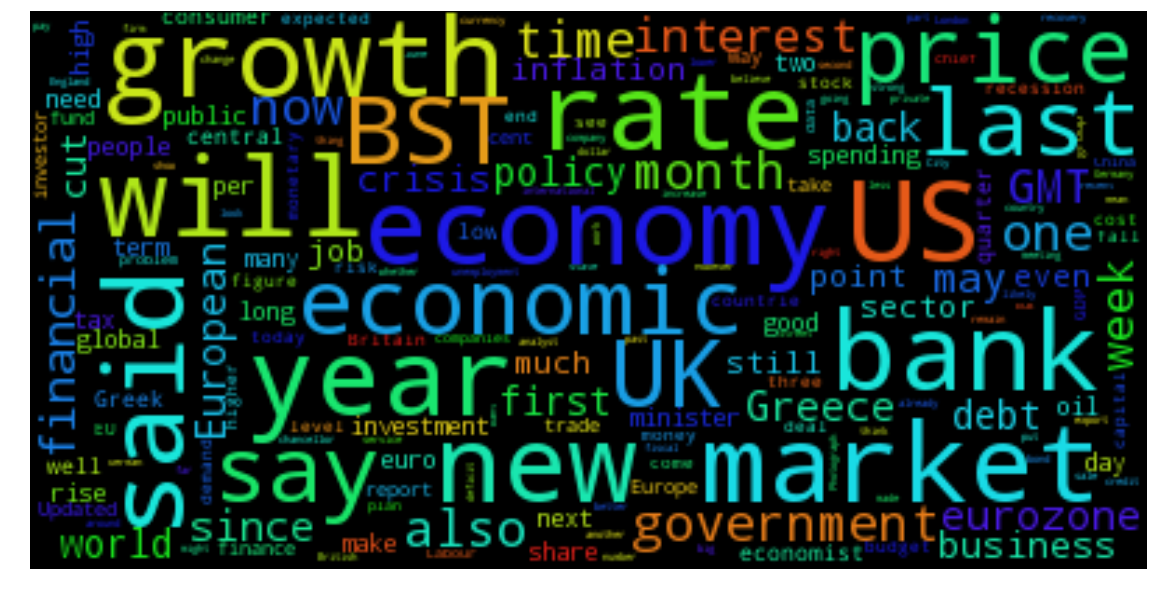

In [61]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [63]:
politics_news = relevant_df[relevant_df['Section'] == 'politics']
politics_words = vectorizer.fit_transform(politics_news['Body Text'])
politics_word_freqs = [(word, politics_words.getcol(idx).sum()) for word, idx in vectorizer.vocabulary_.items()]
#sort from largest to smallest
sorted_politics_words = sorted (politics_word_freqs, key = lambda x: -x[1])
top_politics_words = pd.DataFrame.from_records(sorted_politics_words, columns=['word', 'count'])
top_politics_words.head(10)

In [64]:
wordcloud = WordCloud(max_font_size=40).generate(''.join(list(politics_news['Body Text'].values)))

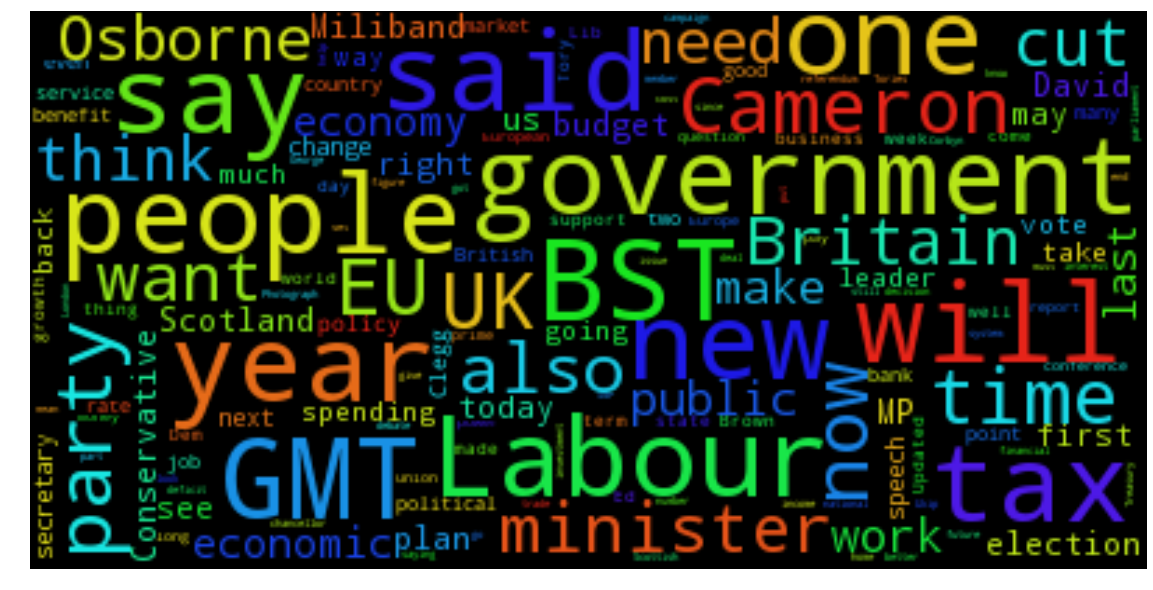

In [65]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [66]:
world_news = relevant_df[relevant_df['Section'] == 'world']
wordcloud = WordCloud(max_font_size=40).generate(''.join(list(world_news['Body Text'].values)))

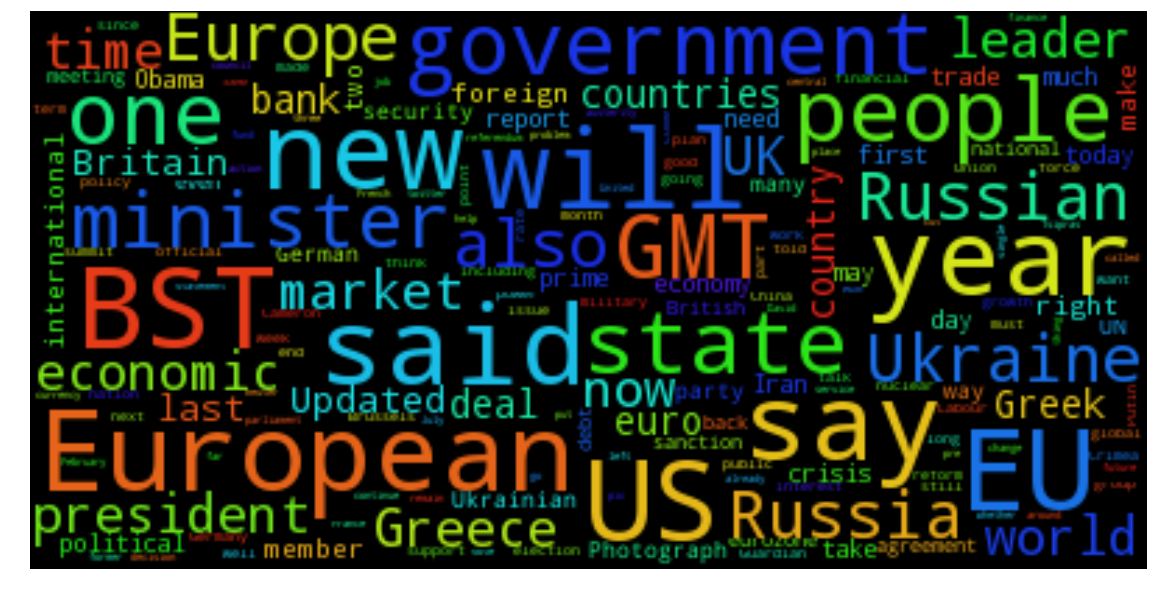

In [67]:
plt.figure(figsize=(20,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()